In [2]:
import os
import sys

file_dir = os.getcwd()
sys.path.append(file_dir + "/mlrose")

import importlib

import mlrose.mlrose_hiive as mlrose
from common import state_fitness_callback
import common


import mlrose_hiive as mlrose
import numpy as np
import itertools
import time

import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True

RHC_ALGO="Random Hill Climb"
SA_ALGO="Simulated Annealing"
GA_ALGO="Genetic Algorithm"
MIMIC_ALGO="MIMIC Algorithm"

rhc_experiment_name = RHC_ALGO.replace(" ","_")
sa_experiment_name = SA_ALGO.replace(" ","_")
ga_experiment_name = GA_ALGO.replace(" ","_")
mimic_experiment_name = MIMIC_ALGO.replace(" ","_")

PROBLEM = "Knapsack"
output_directory = "{}".format(PROBLEM)


In [3]:
# Iterate over tuning parameters below
rhc_restarts=110
rhc_max_attempts = 100
rhc_max_iters = 50000

sa_schedule = mlrose.ExpDecay(init_temp=500, exp_const=0.0001)
sa_max_attempts = 25
sa_max_iters = 50000

ga_pop_size=500
ga_mutation_prob=0.5
ga_max_attempts=15
ga_max_iters=10000

mimic_pop_size=5000
mimic_keep_pct=0.01
mimic_max_attempts=10
mimic_max_iters=10000

In [4]:
# Explore Problem Size

rhc_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}

sa_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}
ga_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}
mimic_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}

random_state=1
for n in range(10, 120, 10):
    weights = []
    values = []
    for i in range(n): 
        weights.append(np.random.randint(n)+1)
        values.append(np.random.randint(n)+1)

    fitness = mlrose.Knapsack(weights, values)
    problem = mlrose.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.choice([0, 1], size=(n,))
    
    print("Running n = {}".format(n))
    print(RHC_ALGO)
    rhc_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    rhc_best_state, rhc_best_fitness, rhc_curve, rhc_call_curve = mlrose.random_hill_climb(problem, restarts=rhc_restarts,
                                                          max_attempts = rhc_max_attempts, max_iters = rhc_max_iters,
                                                          init_state = init_state, curve=True, random_state=random_state,
                                                        state_fitness_callback=common.state_fitness_callback, callback_user_info=rhc_callback_user_info)
    rhc_problem_size_results["problem_size"].append(n)
    rhc_problem_size_results["best_fitness"].append(rhc_best_fitness)
    
    rhc_problem_size_results["fitness_curve"].append(rhc_curve)
    rhc_problem_size_results["max_iterations"].append(len(rhc_curve))
    
    rhc_problem_size_results["call_curve"].append(rhc_call_curve)
    rhc_problem_size_results["max_function_calls"].append(max(rhc_call_curve))
    
    rhc_problem_size_results["time_curve"].append(rhc_callback_user_info['time_taken'])
    rhc_problem_size_results["max_time"].append(max(rhc_callback_user_info['time_taken']))
                         
    print(SA_ALGO)
    sa_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    sa_best_state, sa_best_fitness, sa_curve, sa_call_curve = mlrose.simulated_annealing(problem, schedule = sa_schedule,
                                                      max_attempts = sa_max_attempts, max_iters = sa_max_iters,
                                                      init_state = init_state, curve=True, random_state=random_state,
                                                    state_fitness_callback=state_fitness_callback, callback_user_info=sa_callback_user_info)
    sa_problem_size_results["problem_size"].append(n)
    sa_problem_size_results["best_fitness"].append(sa_best_fitness)
                                            
    sa_problem_size_results["fitness_curve"].append(sa_curve)
    sa_problem_size_results["max_iterations"].append(max(sa_curve))
    
    sa_problem_size_results["call_curve"].append(sa_call_curve)
    sa_problem_size_results["max_function_calls"].append(max(sa_call_curve))
    
    sa_problem_size_results["time_curve"].append(sa_callback_user_info['time_taken'])
    sa_problem_size_results["max_time"].append(max(sa_callback_user_info['time_taken']))
   
    print(GA_ALGO)
    ga_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    ga_best_state, ga_best_fitness, ga_curve, ga_call_curve = mlrose.genetic_alg(problem, pop_size=ga_pop_size, mutation_prob=ga_mutation_prob,
                                                      max_attempts = ga_max_attempts, max_iters = ga_max_iters, curve=True, random_state=random_state,
                                                    state_fitness_callback=state_fitness_callback, callback_user_info=ga_callback_user_info)
    ga_problem_size_results["problem_size"].append(n)
    ga_problem_size_results["best_fitness"].append(ga_best_fitness)
                                           
    ga_problem_size_results["fitness_curve"].append(ga_curve)
    ga_problem_size_results["max_iterations"].append(max(ga_curve))

    ga_problem_size_results["call_curve"].append(ga_call_curve)
    ga_problem_size_results["max_function_calls"].append(max(ga_call_curve))

    ga_problem_size_results["time_curve"].append(ga_callback_user_info['time_taken'])
    ga_problem_size_results["max_time"].append(max(ga_callback_user_info['time_taken']))
                
    print(MIMIC_ALGO)
    mimic_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    mimic_best_state, mimic_best_fitness, mimic_curve, mimic_call_curve =\
    mlrose.mimic(problem, pop_size=mimic_pop_size, keep_pct=mimic_keep_pct, max_attempts = mimic_max_attempts, max_iters = mimic_max_iters, curve=True,
                state_fitness_callback=state_fitness_callback, callback_user_info=mimic_callback_user_info, random_state=random_state)
    mimic_problem_size_results["problem_size"].append(n)
    mimic_problem_size_results["best_fitness"].append(mimic_best_fitness)
                                           
    mimic_problem_size_results["fitness_curve"].append(mimic_curve)
    mimic_problem_size_results["max_iterations"].append(max(mimic_curve))

    mimic_problem_size_results["call_curve"].append(mimic_call_curve)
    mimic_problem_size_results["max_function_calls"].append(max(mimic_call_curve))

    mimic_problem_size_results["time_curve"].append(mimic_callback_user_info['time_taken'])
    mimic_problem_size_results["max_time"].append(max(mimic_callback_user_info['time_taken']))

Running n = 10
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 20
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 30
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 40
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 50
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 60
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 70
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 80
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 90
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 100
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 110
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm


Random Hill Climb best fitness [28.0, 0.0, 0.0, 400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Simulated Annealing best fitness [29.0, 103.0, 176.0, 394.0, 554.0, 858.0, 1069.0, 1862.0, 1974.0, 3055.0, 2664.0]
Genetic Algorithm best fitness [38.0, 137.0, 258.0, 494.0, 736.0, 1260.0, 1555.0, 2204.0, 2645.0, 3707.0, 3886.0]
MIMIC Algorithm best fitness [38.0, 137.0, 258.0, 494.0, 735.0, 1252.0, 1553.0, 1609.0, 2049.0, 2503.0, 2750.0]


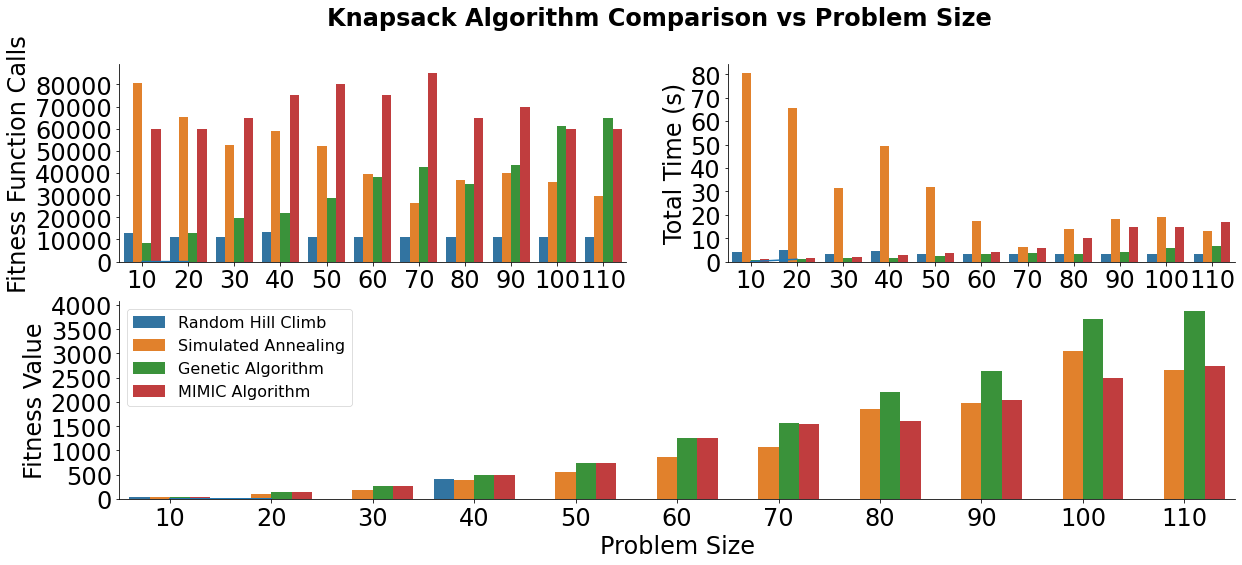

In [4]:
labels = [RHC_ALGO, SA_ALGO, GA_ALGO, MIMIC_ALGO]
results = [rhc_problem_size_results, sa_problem_size_results, ga_problem_size_results, mimic_problem_size_results]
all_fitness = [r['best_fitness'] for r in results]

for f,l in zip(all_fitness, labels):
    print("{} best fitness {}".format(l,f))

max_fitness = np.max(np.array(all_fitness), axis=0)
rhc_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(rhc_problem_size_results["best_fitness"], max_fitness)]
sa_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(sa_problem_size_results["best_fitness"], max_fitness)]
ga_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(ga_problem_size_results["best_fitness"], max_fitness)]
mimic_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(mimic_problem_size_results["best_fitness"], max_fitness)]

results = [rhc_problem_size_results, sa_problem_size_results, ga_problem_size_results, mimic_problem_size_results]

importlib.reload(common)
# common.plot_vs_problem_size(results, labels, PROBLEM, y="max_function_calls")

# importlib.reload(common)
# common.plot_vs_problem_size(results, labels, PROBLEM, y="best_fitness")

# importlib.reload(common)
# common.plot_vs_problem_size(results, labels, PROBLEM, y="max_time")

common.plot_vs_problem_size_three(results, labels, PROBLEM)

In [1]:
importlib.reload(common)

problem_size = 90

for r,l in zip(results, labels):
    index = r["problem_size"].index(problem_size)
    print("{} best fitness = {}".format(l, r["best_fitness"][index]))

common.plot_for_problem_size_all(results, labels, PROBLEM, problem_size=problem_size)

common.plot_for_problem_size(results, labels, PROBLEM, x="call_curve", y="fitness_curve", problem_size=problem_size, log_x=True)


NameError: name 'importlib' is not defined

In [6]:
# Main Problem Creation for Parameter Tuning
n = 90
weights=[]
values=[]
for i in range(n): 
    weights.append(np.random.randint(n)+1)
    values.append(np.random.randint(n)+1)

fitness = mlrose.Knapsack(weights, values)
problem = mlrose.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

init_state = np.random.choice([0, 1], size=(n,))

# Iterate over parameters for each algorithm below

In [7]:
rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name=rhc_experiment_name,
                       output_directoyr=output_directory,
                       seed=1,
                       iteration_list=[rhc_max_iters],
                       restart_list=[i for i in range(10, 140, 20)],
                       max_attempts=rhc_max_attempts)
rhc_run_stats, rhc_curves = rhc.run()
                

Running rhc
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

restarts:[10], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.01], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

restarts:[10], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[1]
runner_name:[rhc], experiment_name:[Rando

restarts:[30], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[1]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.02], fitness:[0.0000]
	[0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1// 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0// 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0]...

restarts:[30], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[2]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[0.0000]
	[0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0// 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1// 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0]...

restarts:[30], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[2]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[

restarts:[30], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.45], fitness:[0.0000]
	[0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0// 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0// 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1]...

restarts:[30], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[20]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.46], fitness:[0.0000]
	[0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1// 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0// 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0]...

restarts:[30], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[20]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.01], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[1]
runne

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[13]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.42], fitness:[0.0000]
	[0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0// 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0// 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[14]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.43], fitness:[0.0000]
	[1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1// 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1// 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[14]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[26]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[1.05], fitness:[0.0000]
	[0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1// 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1// 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.07], fitness:[0.0000]
	[1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0// 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0// 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[1.73], fitness:[0.0000]
	[1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0// 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0// 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.75], fitness:[0.0000]
	[0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0// 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0// 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[2.47], fitness:[0.0000]
	[1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1// 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0// 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[50]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[2.49], fitness:[0.0000]
	[0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0// 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0// 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0]...

restarts:[50], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[50]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[12]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.56], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1// 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1// 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[12]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.60], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1// 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1// 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[13]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[24]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[1.42], fitness:[0.0000]
	[1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1// 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0// 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[25]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.45], fitness:[0.0000]
	[1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1// 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1// 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[25]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[36]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[2.41], fitness:[0.0000]
	[0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0// 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1// 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[37]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[2.43], fitness:[0.0000]
	[0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0// 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0// 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[37]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[48]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[3.40], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1// 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0// 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[3.43], fitness:[0.0000]
	[1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1// 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0// 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[61]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[4.56], fitness:[0.0000]
	[0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0// 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1// 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[61]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[4.63], fitness:[0.0000]
	[0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0// 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1// 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0]...

restarts:[70], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[62]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[3]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.22], fitness:[0.0000]
	[0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1// 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1// 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[4]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.25], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1// 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0// 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[4]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[15]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[1.14], fitness:[0.0000]
	[1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0// 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0// 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[16]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.18], fitness:[0.0000]
	[1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0// 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1// 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[16]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[2.11], fitness:[0.0000]
	[1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0// 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0// 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[28]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[2.14], fitness:[0.0000]
	[0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1// 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0// 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[28]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[3.07], fitness:[0.0000]
	[1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0// 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0// 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[3.13], fitness:[0.0000]
	[1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0// 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0// 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[48]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[4.19], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1// 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0// 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[4.22], fitness:[0.0000]
	[1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1// 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0// 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[60]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[5.63], fitness:[0.0000]
	[1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1// 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0// 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[61]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[5.68], fitness:[0.0000]
	[0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0// 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1// 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[61]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[72]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[7.16], fitness:[0.0000]
	[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1// 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0// 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[73]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[7.20], fitness:[0.0000]
	[1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0// 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1// 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[73]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[84]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[8.85], fitness:[0.0000]
	[0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0// 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0// 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[85]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[8.89], fitness:[0.0000]
	[0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1// 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1// 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1]...

restarts:[90], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[85]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[4]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.41], fitness:[0.0000]
	[0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1// 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0// 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[5]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.45], fitness:[0.0000]
	[1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0// 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0// 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[5]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[15]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.53], fitness:[0.0000]
	[1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0// 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0// 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[15]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[1.59], fitness:[0.0000]
	[1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0// 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0// 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[16]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], tim

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[2.81], fitness:[0.0000]
	[1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0// 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0// 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[2.89], fitness:[0.0000]
	[1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0// 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0// 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[28]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], tim

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[4.26], fitness:[0.0000]
	[1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0// 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0// 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[4.36], fitness:[0.0000]
	[1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0// 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0// 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], tim

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[48]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[5.80], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1// 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0// 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[5.88], fitness:[0.0000]
	[1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1// 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0// 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], 

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[59]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[7.30], fitness:[0.0000]
	[1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1// 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1// 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[60]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[7.35], fitness:[0.0000]
	[1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1// 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0// 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[60]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], 

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[70]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[8.85], fitness:[0.0000]
	[0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0// 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0// 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[70]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[9.00], fitness:[0.0000]
	[0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0// 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0// 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[71]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], tim

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[80]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[10.52], fitness:[0.0000]
	[0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0// 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1// 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[81]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[10.58], fitness:[0.0000]
	[0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1// 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0// 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[81]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True]

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[92]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[12.27], fitness:[0.0000]
	[0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0// 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0// 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[92]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[12.38], fitness:[0.0000]
	[0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0// 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0// 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[93]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], t

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[102]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[14.06], fitness:[0.0000]
	[1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1// 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1// 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[103]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[14.12], fitness:[0.0000]
	[1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1// 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0// 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1]...

restarts:[110], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[103]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[Tr

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[2]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[0.29], fitness:[0.0000]
	[0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0// 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1// 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[3]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.35], fitness:[0.0000]
	[0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1// 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1// 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[3]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], tim

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[14]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[1.78], fitness:[0.0000]
	[1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1// 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1// 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[15]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.84], fitness:[0.0000]
	[1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0// 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0// 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[15]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], 

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[26]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[3.44], fitness:[0.0000]
	[0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1// 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1// 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[3.50], fitness:[0.0000]
	[1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0// 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0// 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[27]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], 

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[37]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[5.06], fitness:[0.0000]
	[0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0// 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0// 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[5.12], fitness:[0.0000]
	[1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0// 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0// 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], 

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[48]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[6.85], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1// 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0// 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[48]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[6.95], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1// 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0// 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], tim

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[58]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[8.61], fitness:[0.0000]
	[1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1// 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1// 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[59]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[8.68], fitness:[0.0000]
	[1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1// 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1// 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[59]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], 

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[69]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[10.50], fitness:[0.0000]
	[0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0// 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0// 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[69]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[10.62], fitness:[0.0000]
	[0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0// 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0// 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[70]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], t

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[79]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[12.71], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0// 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0// 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[80]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[12.79], fitness:[0.0000]
	[0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0// 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1// 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[80]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True]

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[90]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[15.00], fitness:[0.0000]
	[0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1// 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1// 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[90]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[15.16], fitness:[0.0000]
	[0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1// 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1// 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[91]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], t

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[101]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[17.51], fitness:[0.0000]
	[1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1// 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1// 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[101]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[17.66], fitness:[0.0000]
	[1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1// 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1// 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[102]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False]

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[112]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[20.08], fitness:[0.0000]
	[1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0// 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1// 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[112]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[20.22], fitness:[0.0000]
	[1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0// 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1// 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[113]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False]

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[123]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[22.67], fitness:[0.0000]
	[1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0// 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1// 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[123]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[100], done:[True], time:[22.82], fitness:[0.0000]
	[1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0// 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1// 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1]...

restarts:[130], max_iters:[100000], output_directoyr:[Knapsack], current_restart:[124]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False]

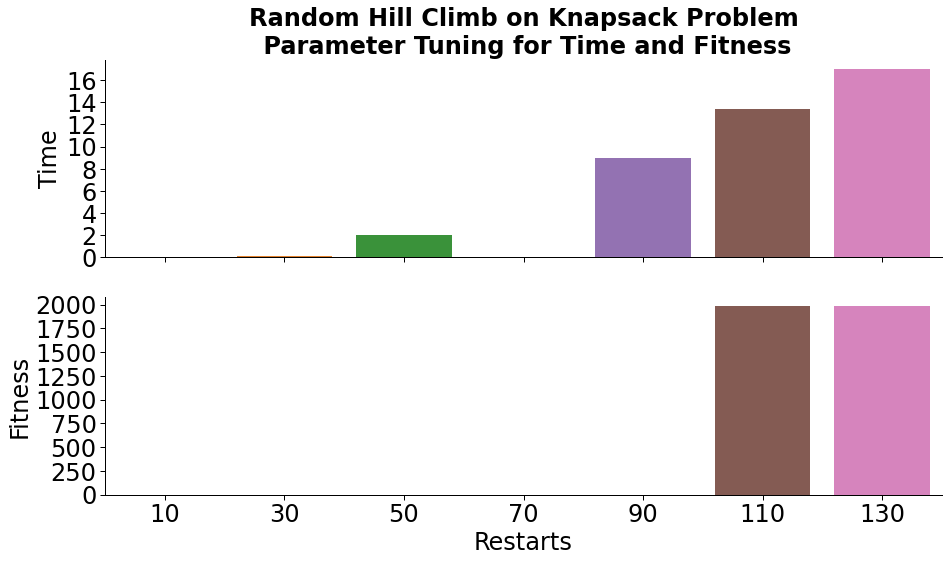

In [8]:
importlib.reload(common)

best_rhc_run_stats = common.get_best_runs_from_runner(rhc_run_stats, ['Restarts'])
common.plot_runner_results_both_1param(best_rhc_run_stats, RHC_ALGO, PROBLEM, param1='Restarts')


In [9]:
decay_list = [0.00005, 0.0001, 0.0005, 0.001, 0.005]
sa = mlrose.SARunner(problem=problem,
              experiment_name=sa_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[sa_max_iters],
              max_attempts=sa_max_attempts,
              decay_list = decay_list,
              temperature_list=[100, 500, 1000, 5000, 10000])

sa_run_stats, sa_curves = sa.run()


Running sa
*****************
*** Run START ***
*****************
schedule:[100], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

schedule:[100], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[101], iteration:[34572], done:[True], time:[44.87], fitness:[2587.0000]
	[0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1// 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1// 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[100], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration

schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[101], iteration:[71009], done:[True], time:[220.26], fitness:[2737.0000]
	[1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1// 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1// 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[101], iteration:[43829], done:[True], time:[117.32], fitness:[2653.0000]
	

schedule:[10000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[8], iteration:[100000], done:[True], time:[411.29], fitness:[1910.0000]
	[0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0// 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1// 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

schedule:[10000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[101], iteration:[65478], done:[True], time:[231.90], fitness:[2764.0000]

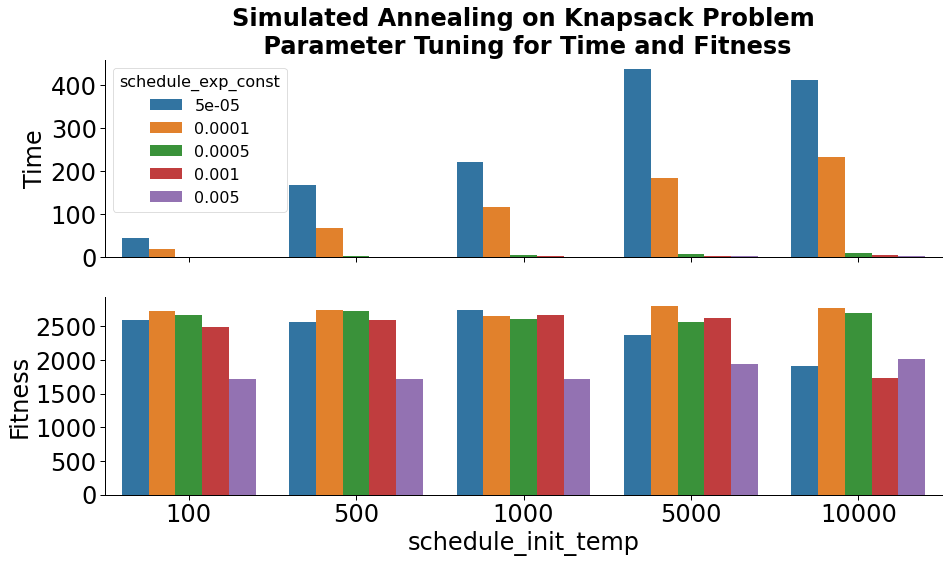

In [10]:
importlib.reload(common)
best_sa_run_stats = common.get_best_runs_from_runner(sa_run_stats, ['schedule_init_temp', 'schedule_exp_const'])
common.plot_runner_results_both(best_sa_run_stats, SA_ALGO, PROBLEM, param1='schedule_init_temp', param2='schedule_exp_const')

In [11]:
ga = mlrose.GARunner(problem=problem,
              experiment_name=ga_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[ga_max_iters],
              max_attempts=ga_max_attempts,
              population_sizes=[50, 100, 500, 1000, 5000],
              mutation_rates=[0.01, 0.05, 0.1, 0.5])

ga_run_stats, ga_curves = ga.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.01], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

pop_size:[50], mutation_prob:[0.01], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[16], iteration:[21], done:[True], time:[0.13], fitness:[1707.0000]
	[0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0// 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0// 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.05], max_iters:[10000]
runner_name:[ga], experiment

pop_size:[500], mutation_prob:[0.1], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[16], iteration:[93], done:[True], time:[4.41], fitness:[2922.0000]
	[1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1// 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1// 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.5], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

pop_size:[500], mutation_prob:[0.5], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[16], iteration:[105], done:[T

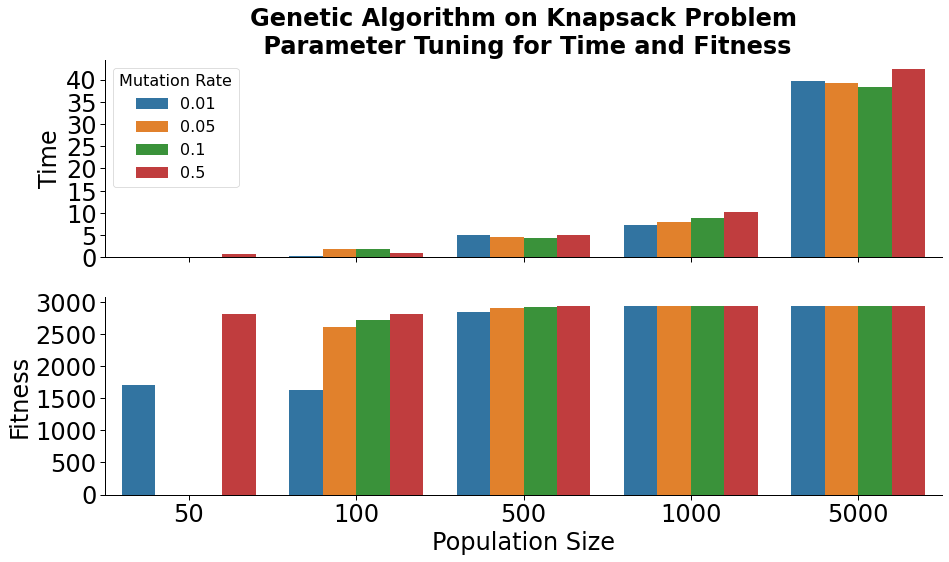

In [12]:
best_ga_run_stats = common.get_best_runs_from_runner(ga_run_stats, ['Population Size','Mutation Rate'])
common.plot_runner_results_both(best_ga_run_stats, GA_ALGO, PROBLEM, param1='Population Size', param2='Mutation Rate')

In [7]:
mimic = mlrose.MIMICRunner(problem=problem,
              experiment_name=mimic_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[mimic_max_iters],
              max_attempts=mimic_max_attempts,
              population_sizes=[50, 100, 500, 1000, 5000, 10000],
              keep_percent_list=[0.005, 0.01, 0.05, 0.1, 0.2])

mimic_run_stats, mimic_curves = mimic.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[50], keep_pct:[0.005], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[50], keep_pct:[0.005], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[11], done:[True], time:[27.76], fitness:[1309.0000]
	[0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.// 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.// 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False]

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.2], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[10], done:[True], time:[24.48], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[500], keep_pct:[0.005], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[500], keep_pct:[0.005], max_iters:[10000]
runner_name:[mimic], experiment_

use_fast_mimic:[False], pop_size:[1000], keep_pct:[0.2], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[18], done:[True], time:[51.08], fitness:[1864.0000]
	[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.// 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.005], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.19], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.005], max_iters:[10000]
runner_name

use_fast_mimic:[False], pop_size:[10000], keep_pct:[0.1], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[13], done:[True], time:[85.37], fitness:[2037.0000]
	[1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.// 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.// 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[10000], keep_pct:[0.2], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.36], fitness:[0.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[10000], keep_pct:[0.2], max_iters:[10000]
runner_name:

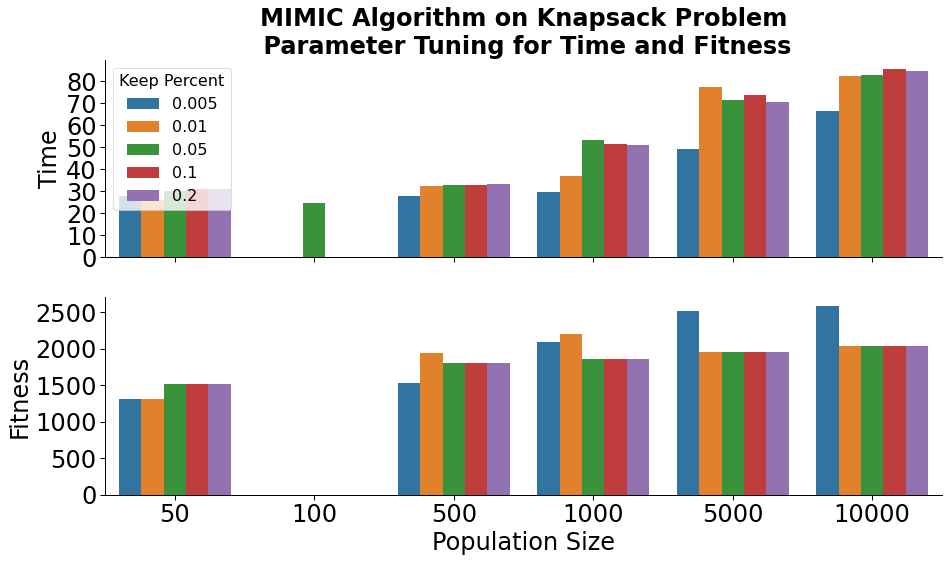

In [8]:
best_mimic_run_stats = common.get_best_runs_from_runner(mimic_run_stats, ['Population Size','Keep Percent'])
common.plot_runner_results_both(best_mimic_run_stats, MIMIC_ALGO, PROBLEM, param1='Population Size', param2='Keep Percent', legend_loc="upper left")